# Lambda: one-line function definition

In [44]:
def fun(x):
    new_x = x - 2
    return x - 2

In [43]:
fun(np.arange(5))

array([-2, -1,  0,  1,  2])

In [40]:
fun = lambda x: x - 2

In [41]:
fun(np.arange(5))

array([-2, -1,  0,  1,  2])

---

# Pandas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

---

## Create a DataFrame

In [63]:
names = ['Mohammad', 'Elizabeth', 'James', 'Daniel', 'Elisa', 'Suleman', 'Alexandra', 'Nick', 'Sara', 'Marie']
ages = [25, 30, 21, 23, 28, 24, 33, 26, 29, 35]
heights = [183, 172, 179, 177, 168, 185, 175, 180, 165, 158]
weights = [90, 70,  61,  67,  93,  88,  70,  79,  73, 65]
genders = ['m', 'f', 'm', 'm', 'f', 'm', 'f', 'm', 'f', 'f']
schools = ['TUM', 'LMU', 'TUM', 'LMU', 'TUM', 'TUM', 'TUM', 'LMU', 'LMU', 'LMU']

dd = {'name': names,
      'age': ages,
      'height': heights,
      'weight': weights,
      'gender': genders, 
      'school': schools}

df = pd.DataFrame(dd)

In [64]:
df

,name,age,height,weight,gender,school
0,Mohammad,25,183,90,m,TUM
1,Elizabeth,30,172,70,f,LMU
2,James,21,179,61,m,TUM
3,Daniel,23,177,67,m,LMU
4,Elisa,28,168,93,f,TUM
5,Suleman,24,185,88,m,TUM
6,Alexandra,33,175,70,f,TUM
7,Nick,26,180,79,m,LMU
8,Sara,29,165,73,f,LMU
9,Marie,35,158,65,f,LMU


---

## Data Inspection
- head and tail
- shape
- columns
- index
- chaing index
- indexing and slicing
- getting a column (or columns) as Numpy array

---

## Saving a DataFrame

## Loading a DataFrame

---

## Masking

In [65]:
df[df['gender'] == 'm'][['name', 'age', 'weight']]

,name,age,weight
0,Mohammad,25,90
2,James,21,61
3,Daniel,23,67
5,Suleman,24,88
7,Nick,26,79


---

## Aggregatin

In [66]:
df['age'].mean()

27.4

In [67]:
df[['age', 'weight', 'height']].mean()

age        27.4
weight     75.6
height    174.2
dtype: float64

#### What if we want to compute several things at the same time?

In [68]:
df[['age', 'weight', 'height']].agg([np.mean, np.std, np.median])

,age,weight,height
mean,27.400000,75.600000,174.200000
std,4.452215,11.276327,8.495751
median,27.000000,71.500000,176.000000


---

## Transformation

In [69]:
df['height']

0    183
1    172
2    179
3    177
4    168
5    185
6    175
7    180
8    165
9    158
Name: height, dtype: int64

In [70]:
df['height'] * 2

0    366
1    344
2    358
3    354
4    336
5    370
6    350
7    360
8    330
9    316
Name: height, dtype: int64

In [71]:
cols = ['age', 'height', 'weight']
(df[cols] - df[cols].mean()) / df[cols].std()

,age,height,weight
0,-0.539057,1.035812,1.277012
1,0.583979,-0.258953,-0.496616
2,-1.437487,0.564988,-1.294748
3,-0.988272,0.329577,-0.762660
4,0.134764,-0.729777,1.543056
5,-0.763665,1.271224,1.099649
6,1.257801,0.094165,-0.496616
7,-0.314450,0.682694,0.301517
8,0.359372,-1.082894,-0.230572
9,1.707015,-1.906836,-0.940022


In [72]:
df[cols].apply(lambda x: (x - x.mean()) / x.std())

,age,height,weight
0,-0.539057,1.035812,1.277012
1,0.583979,-0.258953,-0.496616
2,-1.437487,0.564988,-1.294748
3,-0.988272,0.329577,-0.762660
4,0.134764,-0.729777,1.543056
5,-0.763665,1.271224,1.099649
6,1.257801,0.094165,-0.496616
7,-0.314450,0.682694,0.301517
8,0.359372,-1.082894,-0.230572
9,1.707015,-1.906836,-0.940022


---

## Groupby: Splitting data based on a specific category

In [73]:
grp = df.groupby('gender')

In [74]:
tuple(grp)

(('f',         name  age  height  weight gender school
  1  Elizabeth   30     172      70      f    LMU
  4      Elisa   28     168      93      f    TUM
  6  Alexandra   33     175      70      f    TUM
  8       Sara   29     165      73      f    LMU
  9      Marie   35     158      65      f    LMU),
 ('m',        name  age  height  weight gender school
  0  Mohammad   25     183      90      m    TUM
  2     James   21     179      61      m    TUM
  3    Daniel   23     177      67      m    LMU
  5   Suleman   24     185      88      m    TUM
  7      Nick   26     180      79      m    LMU))

In [75]:
len(grp)

2

In [80]:
cat1, dd1 = tuple(grp)[0]
cat2, dd2 = tuple(grp)[1]

In [81]:
cat1

'f'

In [82]:
dd1

,name,age,height,weight,gender,school
1,Elizabeth,30,172,70,f,LMU
4,Elisa,28,168,93,f,TUM
6,Alexandra,33,175,70,f,TUM
8,Sara,29,165,73,f,LMU
9,Marie,35,158,65,f,LMU


In [83]:
cat2

'm'

In [84]:
dd2

,name,age,height,weight,gender,school
0,Mohammad,25,183,90,m,TUM
2,James,21,179,61,m,TUM
3,Daniel,23,177,67,m,LMU
5,Suleman,24,185,88,m,TUM
7,Nick,26,180,79,m,LMU


#### and we can perform aggregation and transformation on these two groups separately.

- are the guys taller than the girls?
- which gender is heavier?
- are guys younger or older than girls?
- etc.

In [86]:
cols = ['age', 'height', 'weight']
dd1[cols].agg(np.mean)

age        31.0
height    167.6
weight     74.2
dtype: float64

In [87]:
dd2[cols].agg(np.mean)

age        23.8
height    180.8
weight     77.0
dtype: float64

---

## Put things together: Split-apply-combine

#### Aggregation after grouping

In [96]:
df.groupby('gender')[cols].agg(np.mean)

,age,height,weight
gender,,,
f,31.0,167.6,74.2
m,23.8,180.8,77.0


#### Element-wise operations after grouping

In [99]:
df.groupby('gender')[cols].apply(lambda x: x - x.min())

,age,height,weight
0,4,6,29
1,2,14,5
2,0,2,0
3,2,0,6
4,0,10,28
5,3,8,27
6,5,17,5
7,5,3,18
8,1,7,8
9,7,0,0


# Seaborn

In [60]:
import seaborn as sns

In [ ]:
ages = [25, 30, 21, 23, 28, 24, 33, 26, 29, 35]
heights = [183, 172, 179, 177, 168, 185, 175, 180, 165, 158]
weights = [90, 70,  61,  67,  93,  88,  70,  79,  73, 65]
genders = ['m', 'f', 'm', 'm', 'f', 'm', 'f', 'm', 'f', 'f']
schools = ['TUM', 'LMU', 'TUM', 'LMU', 'TUM', 'TUM', 'TUM', 'LMU', 'LMU', 'LMU']

dd = {'age': ages,
      'height': heights,
      'weight': weights,
      'gender': genders, 
      'school': schools}

df = pd.DataFrame(dd)

### Pair plot

/home/mohammad/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


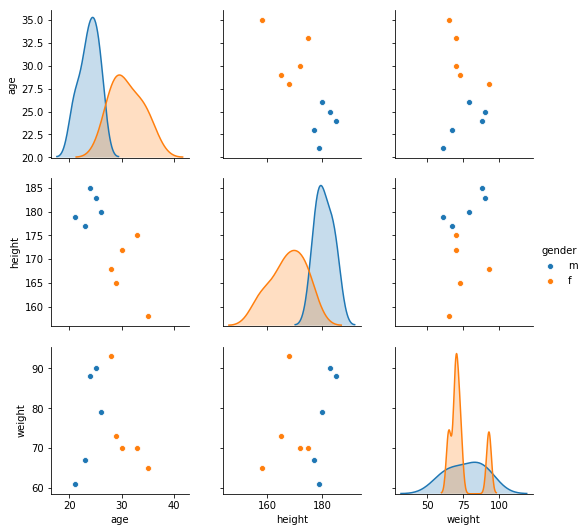

In [107]:
sns.pairplot(df, hue='gender');

### categorical plots

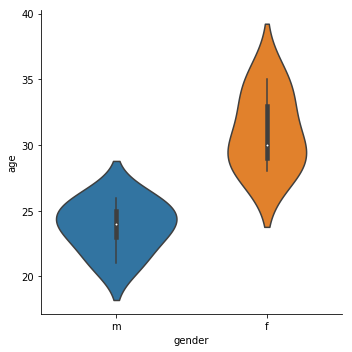

In [104]:
sns.catplot(data=df, x='gender', y='age', kind='violin');

---

# Statistics

In [109]:
from scipy import stats

## Student's T-test

A t-test is most commonly applied when the test statistic would follow a normal distribution if the value of a scaling term in the test statistic were known. When the scaling term is unknown and is replaced by an estimate based on the data, the test statistics (under certain conditions) follow a Student's t distribution. The t-test can be used, for example, to determine if two sets of data are significantly different from each other.

Summary:
- assumption: normal distribution
- population std is not known (so it is approximated from the observed data)
- population std is known, but we have less than 30 observations

<center>
    <img src="https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2013/08/t-score-vs.-z-score.png" />
</center>

### 1-sample t-test: testing the value of a population mean
Question: Is my data coming from a normal distribution with mean zero?

In [36]:
N = 100
my_arr = np.random.randn(N) + 1

In [37]:
stats.ttest_1samp(my_arr, 0)

Ttest_1sampResult(statistic=12.394670249197855, pvalue=7.403273346786394e-22)

**T-statistics**: How far (how many standard deviation) is the sample mean value is far from the hypothesized mean.

**P-values**: Probability of getting a sample mean equal or more extreme than the observed mean.

**So** the greater the t-value, the more evidence we have for significant result, so the p-value is smaller

In [38]:
sem = my_arr.std() / np.sqrt(my_arr.size - 1)
tvalue = (my_arr.mean() - 0) / sem
tvalue

12.394670249197855

### 2-sample t-test: testing for the difference across population

In [51]:
N = 100
arr1 = np.random.randn(N)
arr2 = np.random.randn(N) + .5

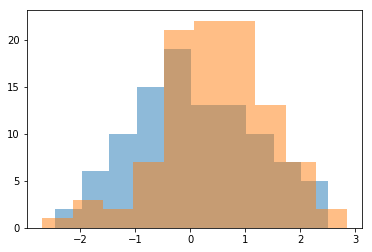

In [52]:
plt.hist(arr1, alpha=.5);
plt.hist(arr2, alpha=.5);

In [53]:
stats.ttest_ind(arr1, arr2)

Ttest_indResult(statistic=-2.5321155244847633, pvalue=0.012113946704148672)

### Paired t-test: testing for the difference across different conditions (same population)

In [54]:
N = 100
arr1 = np.random.randn(N)
arr2 = np.random.randn(N) + .5

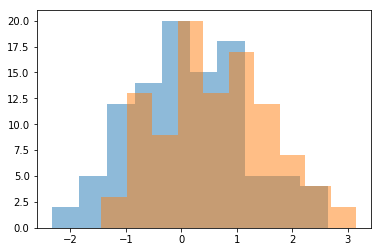

In [56]:
plt.hist(arr1, alpha=.5);
plt.hist(arr2, alpha=.5);

In [55]:
stats.ttest_rel(arr1, arr2)

Ttest_relResult(statistic=-3.7992708998393536, pvalue=0.0002506438274342614)

## ANOVA: comparing more than two groups

In [117]:
N = 20
arr1 = np.random.randn(N)
arr2 = np.random.randn(N) + .1
arr3 = np.random.randn(N) + .2

In [118]:
stats.f_oneway(arr1, arr2, arr3)

F_onewayResult(statistic=0.24753641473886412, pvalue=0.7815566744280638)

---

## Group Project

- Form groups
- download the data
- inspect the data and discuss possible questions
    - is there any correlation between this and that?
    - which two features have the highest correlation?
    - do people from Neuro publish more than people from Biochem?
    - Are Neuro people younger?
    - Do men in Neuro publish more or in Biochem?
    - Do women in Biochem publish more than men?
    - Do Germans publish more than non-Germans?
    - Do German women publish more than non-German women?
    - etc.
- Discuss the questions and assign them to the groups
- Generate figures
- Create a single page slide
- Present it

In [119]:
df = pd.read_csv('../data/MPI-info.csv')

In [121]:
df.head()

,name,sex,from_Germany,MPI,age,papers,citations,colleagues,coffees,ranking
0,Paul Wong,Female,True,Biochem,26.719182,11,80,4,0,82
1,Tyler Lopez,Male,False,Neuro,36.479622,15,219,6,7,74
2,Suzanne Miller,Male,False,Neuro,29.250290,14,174,5,5,46
3,Rebecca Russo,Female,False,Neuro,29.037500,7,137,3,0,261
4,Timothy Chapman,Male,True,Biochem,26.946125,9,55,3,7,186
